In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVC

In [6]:
df = pd.read_csv("DataSet/diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Feature Engineering

In [9]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

In [17]:
model = SVC(kernel='linear', probability=True, random_state=42)

In [18]:
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [36]:
Residual_plot = y_test - y_pred
print(Residual_plot)

668    0
324    0
624    0
690    0
473   -1
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64


In [37]:
plt.scatter(Residual_plot.index y_pred)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2390088707.py, line 1)

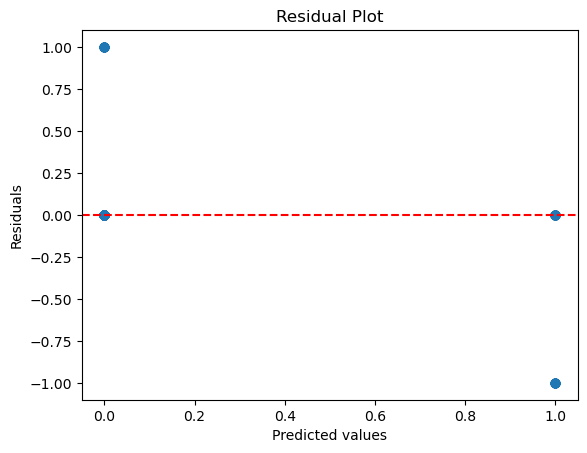

In [40]:
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [21]:
sns.scatterplot(x, y='Glucose', data=df)

NameError: name 'sns' is not defined

In [146]:
import pickle

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [148]:
confusion_matrix(y_pred, y_test)

array([[111,  26],
       [ 40,  54]], dtype=int64)

In [149]:
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

In [150]:
performance_df = {'Accuracy:': [accuracy],
                    'recall:' : [recall],
                    'precision:' : [precision],
                    'F1:' : [f1_score]
    
}

performance_df = pd.DataFrame(performance_df)
performance_df

,Accuracy:,recall:,precision:,F1:
0,0.714286,0.574468,0.675,<function f1_score at 0x00000218A9EFBE20>


In [1]:
sns.pairplot(df, bhue="Outcome")  # hue adds color by target column
plt.show()

NameError: name 'sns' is not defined

In [2]:
# 📌 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# ===============================
# 4. Train & Evaluate
# ===============================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# ===============================
# 5. Results Summary
# ===============================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)


                 Model  Accuracy  F1-score
4                  SVM  0.748918  0.748155
0          Naive Bayes  0.744589  0.746309
1  Logistic Regression  0.735931  0.736312
3        Decision Tree  0.701299  0.707124
2                  KNN  0.692641  0.689091


In [15]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ===============================
# 3. Define models
# ===============================
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# ===============================
# 4. Train & Evaluate
# ===============================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# ===============================
# 5. Summary
# ===============================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison:")
print(results_df)

C:\Users\ASO\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [03:18:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.57      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig